IA & Data science (LU3IN0226) -- 2020-2021
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Edoardo Sarti, Olivier Schwander.*


## Projet 2021

### Préparation du notebook


<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Mohamed Aziz Abderrahmen - David Roqui

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2021</tt> et rajouter à la suite de <tt>projet-2021</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient `projet2021-Skywalker-Solo`

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

## Données

Les données vous sont fournies sur le moodle. 
Ces données sont fournies sur Kaggle, ce sont les données *Google Play Store Apps* accessibles à l'adresse https://www.kaggle.com/lava18/google-play-store-apps.

Il est indispensable de lire en détail la page Kaggle pour comprendre à quoi ces données correspondent.

Le compte-rendu a fournir le jour de la dernière séance de TDTME de votre groupe doit comporter:
- un fichier PDF qui correspond à un poster sur lequel sont expliqués les différents problèmes traités, la façon dont ils ont été traités, et les résultats obtenus.
- un notebook par problème traité, vous pouvez traiter autant de problème que vous le souhaitez. Le problème étudié doit être décrit précisément et vous devez impérativement suivre le format ci-dessous.

Bien entendu, le tout sera mis dans un fichier archive (tar.gz ou zip exclusivement) et déposé sur le site Moodle.


Format à suivre:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import pickle as pkl
%matplotlib inline  



In [2]:
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut
from iads import kmoyennes as km

In [3]:
# Importation du package seaborn:
import seaborn as sns

In [4]:
apps_pd = pd.read_csv('./GoogleApps/googleplaystore.csv')
reviews_pd = pd.read_csv('./GoogleApps/googleplaystore_user_reviews.csv')

In [5]:
apps_pd.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
apps_pd.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
apps_pd[apps_pd.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
apps_pd.drop([10472], inplace=True)
apps_pd[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


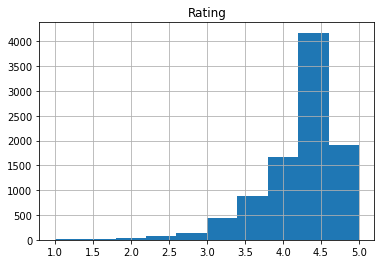

In [9]:
apps_pd.hist()
plt.show()

In [10]:
def impute_median(series):
    return series.fillna(series.median())

In [11]:
apps_pd["Rating"] = apps_pd["Rating"].transform(impute_median)

In [12]:
apps_pd.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [13]:
apps_pd["Type"].fillna(str(apps_pd["Type"].mode().values[0]),inplace=True)


In [14]:
apps_pd.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [15]:
thr = len(apps_pd)*0.1
apps_pd.dropna(thresh = thr, axis = 1, inplace=True)

In [16]:
apps_pd["Installs"] = apps_pd["Installs"].apply(lambda x : str(x).replace("+","") if "+" in str(x) else str(x))
apps_pd["Installs"] = apps_pd["Installs"].apply(lambda x : str(x).replace(",","") if "," in str(x) else str(x))
apps_pd["Installs"] = apps_pd["Installs"].apply(lambda x : float(x))

In [17]:
apps_pd["Reviews"] = pd.to_numeric(apps_pd["Reviews"], errors = "coerce")

In [18]:
apps_pd["Price"] = pd.to_numeric(apps_pd["Price"], errors = "coerce")

In [19]:
apps_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10040 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


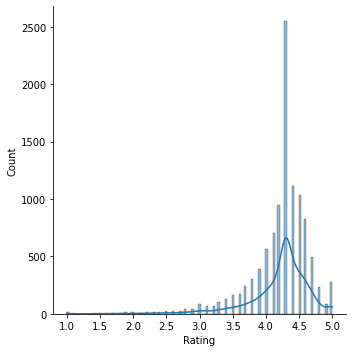

In [20]:
apps_pd["Rating"] = pd.to_numeric(apps_pd["Rating"], errors = "coerce")
sns.displot(apps_pd["Rating"], kde = True)

## Partie 1 - Description du problème

In [21]:
#Première problématique : 
#1Description : La première problématique consiste à prédire la note d'une application donnée par les utlisateurs, pour cela on va utiliser de différentes approches pour arriver à notre solution, les comparer et conclure 
    #Dans un premier temps, on va essayer de prédire le "Rating" suivant deux valeurs ( 1 si Rating > 3.5 -1 sinon) avec "Reviews"      et "Installs" et voir si c'est deux features sont suffisants.
    # Dans un deuxième temps, on va essayer de prédire le "Rating" avec 3 features qui sont "Type", "Reviews" et "Installs"

In [22]:
p1_df = apps_pd[['Reviews','Installs','Rating','Price']].copy(deep=True)

In [23]:
p1_df["Rating"].mean()

4.206476014760147

In [24]:
p1_df["Rating"] = [1 if j > 4.1 else -1 for j in p1_df.Rating]

In [25]:
p1_df.loc[p1_df['Rating'] == -1]

,Reviews,Installs,Rating,Price
0,159,10000.0,-1,0.0
1,967,500000.0,-1,0.0
6,178,50000.0,-1,0.0
7,36815,1000000.0,-1,0.0
15,55,5000.0,-1,0.0
...,...,...,...,...
10826,88486,5000000.0,-1,0.0
10828,291,10000.0,-1,0.0
10830,881,100000.0,-1,0.0
10832,1195,100000.0,-1,0.0


In [26]:
## Partie 2 - Modèle
# Pour qu'on puisse calculer le rating, on va utiliser le perceptron et les deux features "Reviews" et "Installs". Ensuite, avec notre modèle on va essayer de prédire la valeur de la cible ce qui est dans notre cas 1 pour une appli qui a un rating > 3.5 -1 sinon. Et à la fin, on termine par une analyse des résultats et une conclusion 

In [27]:
desc = p1_df[['Reviews','Installs']]
desc = desc.to_numpy()

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
label = p1_df.Rating
label = label.to_numpy()

In [29]:
print(len(label))
s = 0
for i in label:
    if i == -1:
        s+= 1
print(s)

10840
3274


In [30]:
Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(desc, label, 10, 6)


In [31]:
def test(N, eps):
    percep = classif.ClassifierPerceptronBiais(2,eps)
    X = np.zeros(N)
    Y = np.zeros(N)
    Z = np.zeros(N)
    w = []
    x = []
    y = []
    for i in range (N):
        X[i] = i
        Y[i] = percep.accuracy(Xapp,Yapp)
        x.append(percep.w[0])
        y.append(percep.w[1])
        Z[i] = percep.accuracy(Xtest,Ytest)
        percep.train(Xapp,Yapp)

    print(percep.accuracy(Xapp,Yapp))
    print(percep.accuracy(Xtest,Ytest))
    plt.plot(X,Y, label = "Training")
    plt.plot(X,Z, label = "Testing")
    plt.legend()
    plt.show()
    return x,y

0.7015384615384616
0.6851851851851852


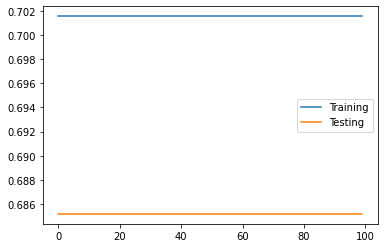

In [32]:
x,y = test(100,0.001)
plt.show()

In [33]:
desc2 = p1_df[['Reviews','Installs','Price']]
desc2 = desc2.to_numpy()

In [34]:
desc2

array([[1.59000e+02, 1.00000e+04, 0.00000e+00],
       [9.67000e+02, 5.00000e+05, 0.00000e+00],
       [8.75100e+04, 5.00000e+06, 0.00000e+00],
       ...,
       [3.00000e+00, 1.00000e+03, 0.00000e+00],
       [1.14000e+02, 1.00000e+03, 0.00000e+00],
       [3.98307e+05, 1.00000e+07, 0.00000e+00]])

In [35]:
Xapp1,Yapp1,Xtest1,Ytest1 = ut.crossval_strat(desc2, label, 10, 6)


In [36]:
def test2(N, eps):
    percep = classif.ClassifierPerceptronBiais(3,eps)
    X = np.zeros(N)
    Y = np.zeros(N)
    Z = np.zeros(N)
    w = []
    x = []
    y = []
    z = []
    for i in range (N):
        X[i] = i
        Y[i] = percep.accuracy(Xapp1,Yapp1)
        x.append(percep.w[0])
        y.append(percep.w[1])
        z.append(percep.w[2])
        Z[i] = percep.accuracy(Xtest1,Ytest1)
        percep.train(Xapp1,Yapp1)

    print(percep.accuracy(Xapp1,Yapp1))
    print(percep.accuracy(Xtest1,Ytest1))
    plt.plot(X,Y, label = "Training")
    plt.plot(X,Z, label = "Testing")
    plt.legend()
    plt.show()
    return (x,y,z)

0.6461538461538462
0.6388888888888888


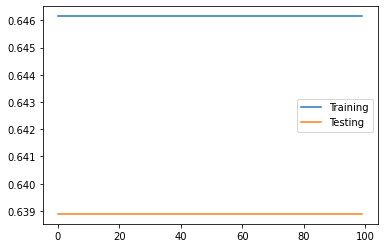

In [37]:
x2,y2,z2 = test2(100,0.0001)
plt.show()

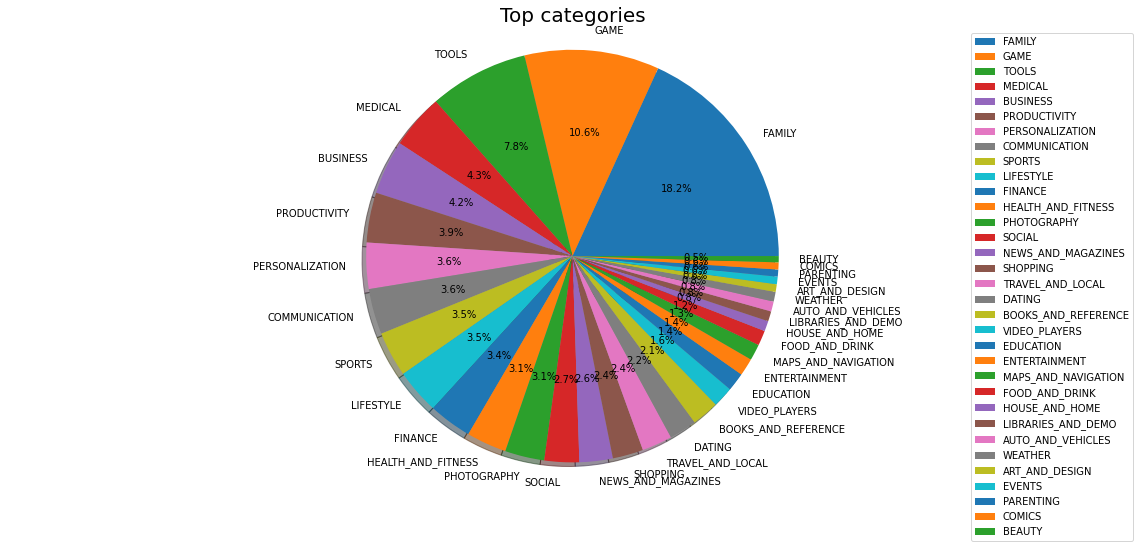

In [38]:
fig = plt.figure(figsize=(16,8)) 
labels = apps_pd['Category'].value_counts(sort = True).index
sizes = apps_pd['Category'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Top categories',size = 20)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [39]:
label2 = apps_pd['Category']
#desc2["Category"] = desc2["Category"].apply(lambda x : str(x))

In [40]:
#label2["Category"] = label2["Category"].apply(lambda x : str(x))
label2.apply(lambda x : str(x))
label2 = pd.DataFrame(label2)

In [41]:
label2["Category"] = [1 if j.strip() == "FAMILY" else -1 for j in label2.Category]

In [42]:
label2 = label2["Category"].to_numpy()

In [43]:
label2

array([-1, -1, -1, ..., -1, -1, -1])

In [44]:
desc3 = apps_pd[['Installs','Rating']]
desc3 = desc3.to_numpy()

In [45]:
Xapp2,Yapp2,Xtest2,Ytest2 = ut.crossval_strat(desc3, label2, 20, 14)


In [46]:
%load_ext autoreload
%autoreload 2

In [47]:
knn = classif.ClassifierKNN(2,3)
knn.train(Xapp2,Yapp2)


accuracy sur le set_training 0.8446601941747572 Accuracy sur le set_test 0.6666666666666666


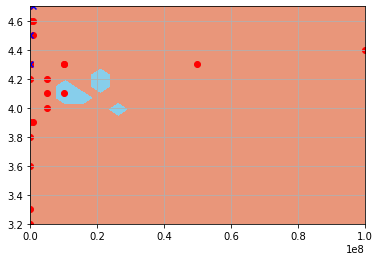

In [48]:
ut.plot_frontiere(Xtest2,Ytest2,knn,20)
ut.plot2DSet(Xtest2,Ytest2)
print('accuracy sur le set_training',knn.accuracy(Xapp2,Yapp2), 'Accuracy sur le set_test',knn.accuracy(Xtest2,Ytest2))

In [49]:
adaline2 = classif.ClassifierADALINE2(2)
adaline2.train(Xapp2,Yapp2)
ut.plot_frontiere_V3(Xapp2,Yapp2, adaline2.w, ut.k_id, step=5, forme=1, fname=None)


In [50]:
Xtest2

array([[1.0e+04, 4.7e+00],
       [1.0e+06, 4.6e+00],
       [5.0e+06, 4.2e+00],
       [1.0e+05, 4.6e+00],
       [1.0e+04, 4.2e+00],
       [5.0e+07, 4.3e+00],
       [1.0e+07, 4.3e+00],
       [1.0e+03, 3.2e+00],
       [0.0e+00, 4.3e+00],
       [1.0e+07, 4.3e+00],
       [1.0e+06, 3.9e+00],
       [5.0e+03, 4.5e+00],
       [1.0e+01, 4.3e+00],
       [5.0e+06, 4.1e+00],
       [1.0e+01, 4.3e+00],
       [1.0e+03, 4.3e+00],
       [1.0e+03, 4.3e+00],
       [1.0e+03, 3.8e+00],
       [1.0e+04, 3.6e+00],
       [5.0e+06, 4.0e+00],
       [5.0e+03, 3.3e+00],
       [5.0e+01, 4.3e+00],
       [1.0e+07, 4.1e+00],
       [1.0e+08, 4.4e+00],
       [1.0e+06, 4.7e+00],
       [1.0e+06, 4.5e+00],
       [1.0e+05, 3.9e+00]])

In [51]:
abr = classif.ClassifierArbreDecision(2,0.1)
abr.train(Xtest2[0:len(Xtest2)],Ytest2[0:len(Ytest2)])

]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]
 [1000.     4.3]]
2
[[1000.     4.3]

RecursionError: maximum recursion depth exceeded while calling a Python object

In [52]:
import graphviz as gv


In [53]:
gr_abr = gv.Digraph(format='png')
abr.affiche(gr_abr)
gr_abr

TypeError: cannot use a string pattern on a bytes-like object

In [51]:
apps_pd

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [52]:
reviews_pd

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [53]:
###### Non Supervised #######
# Pour cette partie, on a décidé de catégoriser les applications qui sont destinées pour certaine tranche d'age (Mature, Teen,Everyone, etcc..)


SyntaxError: invalid syntax (<ipython-input-53-ab1b8cdc2686>, line 2)

In [53]:
reviews_pd["Sentiment"] = reviews_pd["Sentiment"].apply(lambda x : str(x))

In [54]:
reviews_pd["Sentiment"] = [-1 if j.strip() == 'Negative' else 1 for j in reviews_pd.Sentiment]

In [55]:
rv = reviews_pd.loc[reviews_pd['Sentiment'] == -1]

In [51]:
apps_pd["Category"] =apps_pd["Category"].apply(lambda x : str(x))
apps_pd["Last Updated"] =apps_pd["Last Updated"].apply(lambda x : str(x))


In [52]:
categ = apps_pd['Category'].drop_duplicates().tolist()


In [53]:
categ = apps_pd['Category'].drop_duplicates().tolist()

In [54]:
categ

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [55]:
# for c in categ:
#     apps_pd[c.lower()] = apps_pd.apply(lambda f: 2*int(c in f["Category"]) - 1, axis=1)
# apps_pd.drop("Category", axis=1, inplace=True)

In [56]:
apps_pd['Content Rating'] = apps_pd['Content Rating'].apply(lambda x: str(x))

In [57]:
apps_pd['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 10840, dtype: object

In [58]:
mature = apps_pd[apps_pd['Content Rating'] == 'Mature 17+']

In [59]:
bas = apps_pd[apps_pd['Rating'] > 4.3]

In [60]:
family = apps_pd[apps_pd['Category'] == 'Family']

In [188]:
# columns = ['art_and_design', 'auto_and_vehicles', 'beauty',
#        'books_and_reference', 'business', 'comics', 'communication', 'dating',
#        'education', 'entertainment', 'events', 'finance', 'food_and_drink',
#        'health_and_fitness', 'house_and_home', 'libraries_and_demo',
#        'lifestyle', 'game', 'family', 'medical', 'social', 'shopping',
#        'photography', 'sports', 'travel_and_local', 'tools', 'personalization',
#        'productivity', 'parenting', 'weather', 'video_players',
#        'news_and_magazines', 'maps_and_navigation','Reviews','Installs','Price']
columns = ['Rating','Reviews']

In [189]:
columnsOK = apps_pd[columns].std()!=0
columns = [c for c in columns if columnsOK[c]]

In [190]:
apps_pd[columns].std()==0

art_and_design         False
auto_and_vehicles      False
beauty                 False
books_and_reference    False
business               False
comics                 False
communication          False
dating                 False
education              False
entertainment          False
events                 False
finance                False
food_and_drink         False
health_and_fitness     False
house_and_home         False
libraries_and_demo     False
lifestyle              False
game                   False
family                 False
medical                False
social                 False
shopping               False
photography            False
sports                 False
travel_and_local       False
tools                  False
personalization        False
productivity           False
parenting              False
weather                False
video_players          False
news_and_magazines     False
maps_and_navigation    False
Reviews                False
Installs      

In [191]:
clust = family[columns]

In [192]:
arr = clust.to_numpy()

In [193]:
dataKmeans = km.normalisation(arr)

In [194]:
centres_2k, l_affectation_2k = km.kmoyennes(2, dataKmeans, 0.01, 10)
print("Affichage des centres: \n",centres_2k)
print("Affichage des affectations: ",l_affectation_2k)


Affichage des centres: 
 [[0.00000000e+00 0.00000000e+00 3.12499999e-11 3.12499999e-11
  1.04166666e-11 7.29166665e-11 3.12499999e-11 1.91666666e-09
  3.12499999e-11 4.16666666e-11 0.00000000e+00 0.00000000e+00
  0.00000000e+00 7.29166665e-11 0.00000000e+00 0.00000000e+00
  7.29166665e-11 4.89583332e-10 4.89583332e-10 7.29166665e-11
  2.81249999e-10 2.08333333e-11 1.04166666e-11 7.29166665e-11
  0.00000000e+00 2.08333333e-11 9.37499998e-11 1.04166666e-11
  1.04166666e-11 1.04166666e-11 2.08333333e-11 7.29166665e-11
  1.04166666e-11 4.45645364e-05 1.42964355e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.79775281e-10 7.64044942e-10
  0.00000000e+00 2.24719101e-10 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.49438201e-11 8.98876403e-10 1.34831460e-10 0.00000000e+00
  1.34831460e-09 4.49438201e-11 8.98876403e-11 0.00000000e+00
  4.49438201e-11 0.00000000e+00 0.00000000e+00 0.00000000e+

In [195]:
kMax = 15
tabEval = np.full(kMax, float("inf"))

for k in range(2, kMax):
    print("Calcul de k moyennes avec k =",k)
    centres, affectation = km.kmoyennes(k, dataKmeans, 0.05, 100, verbose = False)
    tabEval[k] = km.evaluation(dataKmeans, centres, affectation)

Calcul de k moyennes avec k = 2
Calcul de k moyennes avec k = 3
Calcul de k moyennes avec k = 4
Calcul de k moyennes avec k = 5
Calcul de k moyennes avec k = 6
Calcul de k moyennes avec k = 7
Calcul de k moyennes avec k = 8
Calcul de k moyennes avec k = 9
Calcul de k moyennes avec k = 10
Calcul de k moyennes avec k = 11
Calcul de k moyennes avec k = 12
Calcul de k moyennes avec k = 13
Calcul de k moyennes avec k = 14


Text(0.5, 1.0, 'Évaluation de k moyennes en fonction de k')

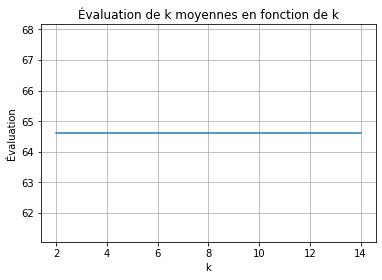

In [196]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_axisbelow(True)
ax.plot(tabEval)
ax.set_xlabel("k")
ax.set_ylabel("Évaluation")
ax.set_title("Évaluation de k moyennes en fonction de k")

In [197]:
centres, affectation = km.kmoyennes(4, dataKmeans, 0.01, 10, verbose = False)


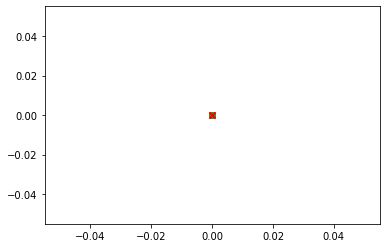

In [198]:
km.affiche_resultat(dataKmeans,centres,affectation)

In [199]:
reviews_pd.info

<bound method DataFrame.info of                                App  \
0            10 Best Foods for You   
1            10 Best Foods for You   
2            10 Best Foods for You   
3            10 Best Foods for You   
4            10 Best Foods for You   
...                            ...   
64290  Houzz Interior Design Ideas   
64291  Houzz Interior Design Ideas   
64292  Houzz Interior Design Ideas   
64293  Houzz Interior Design Ideas   
64294  Houzz Interior Design Ideas   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2                                                    NaN       NaN   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
...                                                  ...       ...   
64290                

## Partie 3 - Code

## Partie 4 - Protocole expérimental

## Partie 5 - Résultats

## Partie 6 - Analyse